In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [3]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [4]:
len(training_data_list)

100

In [5]:
training_data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
all_values = training_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))

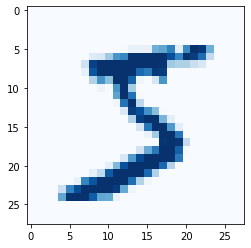

In [7]:
matplotlib.pyplot.imshow(image_array, cmap="Blues",interpolation='None' )

In [8]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [9]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        self.lr = learning_rate
        
        self.activation_function = lambda x:scipy.special.expit(x);
        
        # weights between -0.5 & 0.5
        self.weights_input_hidden = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        self.weights_hidden_output = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        
        # weights distributed normally around 0.0
        self.weights_input_hidden_distributed = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.weights_hidden_output_distributed = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        
        #calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        #error is the (target - actual)
        output_errors = targets - final_outputs
        
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.weights_hidden_output.T, output_errors)
        
        #update the weights for the links between the hidden and output layers
        self.weights_hidden_output += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        #update the weights for the links between the input and hidden layers
        self.weights_input_hidden += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    
    def query(self, input_list):
        
        # convert inputs list to 2d array & transpose
        inputs = np.array(input_list, ndmin=2).T
        
        #print(inputs)
        
        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        
        #calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    def summary(self):
        print("amt_input_nodes:", self.inodes)
        print("amt_hidden_nodes:", self.hnodes)
        print("amt_output_nodes:", self.onodes)
        print("learning_rate:", self.lr)

In [10]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
nn.summary()

amt_input_nodes: 784
amt_hidden_nodes: 100
amt_output_nodes: 10
learning_rate: 0.3


In [11]:
#train
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    nn.train(inputs, targets)
    pass

In [12]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = nn.query(inputs)
    
    label = np.argmax(outputs)
    print(label, "network's answer")
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [15]:
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6
